In [1]:
import warnings  #evitar warnings
import pandas as pd  #trabajar tablas y estructuras de datos
from pandas import ExcelWriter 
from pandas import ExcelFile
from pandas import datetime
from pandas import DataFrame
import numpy as np #vectores y matrices multidimensiones y operaciones complejas
import matplotlib.pyplot as plt  #para trabajar graficos
from openpyxl import Workbook #en caso de ser necesario instalar la libreria openpyxl y workbook para excel
import statsmodels.api as sm  #explorar modelos estadisticos
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose #descomposición de la serie
from sklearn.metrics import mean_squared_error, mean_absolute_error #biblioteca de aprendizaje automatico
from sklearn.model_selection import train_test_split
from math import sqrt #operaciones matematicas 
from tkinter import filedialog #tkinter trabaja ambiente grafico
import pmdarima as pm #autoarima... se debe de instalar pip install pmdarima

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta #pip install python-dateutil

<ipython-input-1-ade048c78100>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
warnings.filterwarnings("ignore")
#variables para cambiar en el modelo 
tiempo_pronosticar=12 #ventana de tiempo a pronosticar
tren='add' #tendencia aditiva o multiplicativa
seas='mul' #estacionalidad multiplicativa
filename =  filedialog.askopenfilename(initialdir = "/",title = "Seleccione el archivo",filetypes = (("Archivos CSV","*.xlsx"),("Todos los Archivos","*.*")))

In [33]:
filename

'C:/Users/F32740/OneDrive - Kimberly-Clark/Documents/U/Análisis de datos/Clase 1/Ejercicio.xlsx'

In [34]:
df = pd.read_excel(filename, sheet_name='Ejercicio') #Modificar en caso de cambiar nombre de hoja
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FECHA   144 non-null    datetime64[ns]
 1   Vuelos  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


,FECHA,Vuelos
0,2008-08-01,112
1,2008-09-01,118
2,2008-10-01,132
3,2008-11-01,129
4,2008-12-01,121
5,2009-01-01,135
6,2009-02-01,148
7,2009-03-01,148
8,2009-04-01,136
9,2009-05-01,119


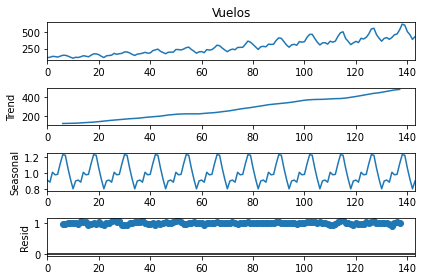

In [35]:
#descomposición de la serie de tiempo, importante la frecuencia como es por mes, 12 meses
result = seasonal_decompose(df.iloc[:, 1], model=seas, freq=12) # 1 me meustra la columna 2
result.plot()
plt.show()

In [36]:
#Convertir la fecha en un formato pandas 
df.Timestamp = pd.to_datetime (df.iloc[:, 0], format = "%d/%m/%Y") #indexa la fecha, le da formato
df.index = df.Timestamp
df.head(10)

#df.iloc[:,0] tomo la primera columna, es esquivalente a decir df.FECHAS

,FECHA,Vuelos
FECHA,,
2008-08-01,2008-08-01,112
2008-09-01,2008-09-01,118
2008-10-01,2008-10-01,132
2008-11-01,2008-11-01,129
2008-12-01,2008-12-01,121
2009-01-01,2009-01-01,135
2009-02-01,2009-02-01,148
2009-03-01,2009-03-01,148
2009-04-01,2009-04-01,136


In [37]:
#separación de set de datos, entrenamiento y test

df1=df.iloc[:, 1] #copia de la columna facturación, es equivalente a df.facturacion
#y tiene los valores de facturación
#X tiene los valores de fecha

train=df[0:int(0.9*(len(df)))] #entrenamiento
test=df[int(0.9*(len(df))):]  #test

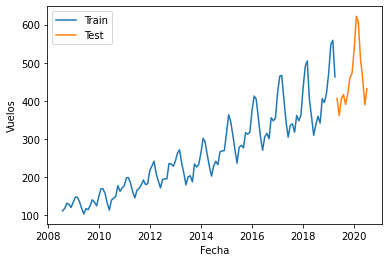

In [38]:
plt.plot(train.iloc[:, 1], label='Train') #grafica los valores de entrenamiento
plt.plot(test.iloc[:, 1], label='Test') #grafica los valores del test
plt.legend(loc='best')
plt.xlabel('Fecha') #colocar el nombre de las variables
plt.ylabel('Vuelos')
plt.show()

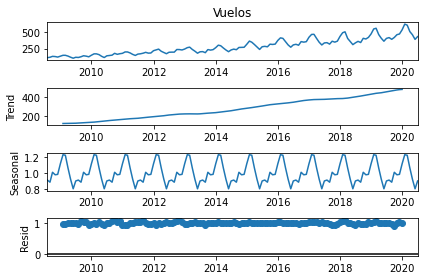

In [39]:
result = seasonal_decompose(df.iloc[:, 1], model=seas, freq=12)  #descomposición de la serie de tiempo, importante la frecuencia
result.plot()
plt.show()

In [40]:
#METODO DE HOLT-WINTERS

HW = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train.iloc[:, 1]) ,seasonal_periods=12 ,trend= tren, seasonal=seas).fit()
HW['Holt_Winter'] = fit1.forecast(len(test))

print ('Metricas de Validación HoltWinter')
print('MAPE: ',np.mean(np.abs((test.iloc[:, 1] - HW.Holt_Winter) / test.iloc[:, 1])) * 100)
print('MAE:', mean_absolute_error(test.iloc[:, 1], HW.Holt_Winter))
print('RMSE: ',sqrt(mean_squared_error(test.iloc[:, 1], HW.Holt_Winter)))
print('MSE: ',(mean_squared_error(test.iloc[:, 1], HW.Holt_Winter)))

Metricas de Validación HoltWinter
MAPE:  4.323957274169424
MAE: 19.297799531391554
RMSE:  20.92659359418078
MSE:  437.9223194560081


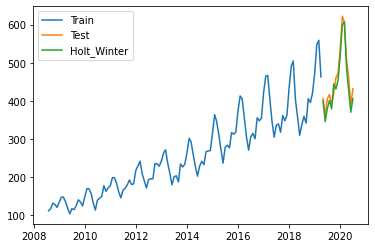

In [41]:
#GRÁFICOS HOLTWINTER
plt.plot(train.iloc[:, 1], label='Train')
plt.plot(test.iloc[:, 1], label='Test')
plt.plot(HW.Holt_Winter, label='Holt_Winter')
plt.legend(loc='best')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=879.138, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=881.901, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=877.920, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=878.938, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=876.775, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=878.101, Time=0.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=877.993, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=877.677, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=877.710, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=879.650, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=878.414, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.233 seconds
                                     SARIMAX Results                                      


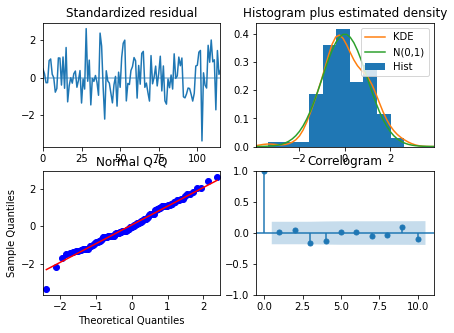

In [42]:
#MÉTODO SARIMA AUTOCALIBRACIÓN

model = pm.auto_arima(train.iloc[:, 1], start_p=1, start_q=1,
                         test='adf', #prueba test Fuller
                         max_p=9, max_q=9, m=12, #se pueden cambiar p y q #M es la frecuencia
                         start_P=0, seasonal=True, #componente estacional
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

print(model.summary())
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [43]:
#PROYECCIÓN SARIMA

SA = test.copy()

model.fit(train.iloc[:, 1])
SA['SARIMA'] = model.predict(n_periods=len(test))

print ('Metricas de Validación SARIMA')
print('MAPE: ',np.mean(np.abs((test.iloc[:, 1] - SA.SARIMA) / test.iloc[:, 1])) * 100)
print('MAE:', mean_absolute_error(test.iloc[:, 1], SA.SARIMA))
print('RMSE: ',sqrt(mean_squared_error(test.iloc[:, 1], SA.SARIMA)))
print('MSE: ',(mean_squared_error(test.iloc[:, 1], SA.SARIMA)))

#METODO DE HOLT-WINTERS

Metricas de Validación SARIMA
MAPE:  3.175808534989525
MAE: 13.990150702418559
RMSE:  18.13624791772362
MSE:  328.9234885331343


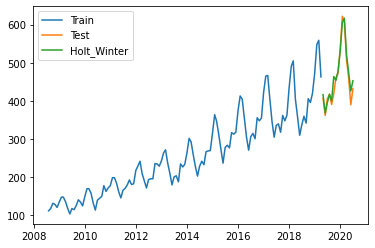

In [44]:
#GRÁFICOS SARIMA
plt.plot(train.iloc[:, 1], label='Train')
plt.plot(test.iloc[:, 1], label='Test')
plt.plot(SA.SARIMA, label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [45]:
#Crear proyecciones Holtwinter

fit_1 = ExponentialSmoothing((df1) ,seasonal_periods=12 ,trend=tren, seasonal=seas).fit()
HW_forcast = fit_1.forecast(tiempo_pronosticar)
print('Proyecciones HoltWinter')
HW_forcast.head(100)

Proyecciones HoltWinter


2020-08-01    445.242238
2020-09-01    418.225149
2020-10-01    465.309453
2020-11-01    494.950825
2020-12-01    505.475429
2021-01-01    573.312059
2021-02-01    663.595592
2021-03-01    654.903186
2021-04-01    546.760251
2021-05-01    488.446199
2021-06-01    415.722979
2021-07-01    460.377125
Freq: MS, dtype: float64

In [46]:
#pronosticar Autosarima
models = pm.auto_arima(df.iloc[:, 1], start_p=1, start_q=1,
                         test='adf', #prueba test Fuller
                         max_p=9, max_q=9, m=12, #se pueden cambiar p y q #M es la frecuencia
                         start_P=0, seasonal=True, #componente estacional
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


fecha=df.index[-1]+ relativedelta(months=1)
AS_forcast2 = models.predict(n_periods=tiempo_pronosticar)
indexar_fecha = pd.date_range(fecha, periods = tiempo_pronosticar, freq='MS')
AS_forcast = pd.Series(AS_forcast2, index=indexar_fecha)
print('Proyecciones SARIMA')
AS_forcast.head(100)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.22 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.01 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.11 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.23 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.33 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.07 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.38 sec
 ARIMA(0,1,1)(1,1,1)[12]     

2020-08-01    451.347077
2020-09-01    427.102222
2020-10-01    463.382490
2020-11-01    499.705771
2020-12-01    514.035525
2021-01-01    571.851867
2021-02-01    661.310509
2021-03-01    648.081675
2021-04-01    551.284691
2021-05-01    501.068279
2021-06-01    434.052984
2021-07-01    479.233768
Freq: MS, dtype: float64

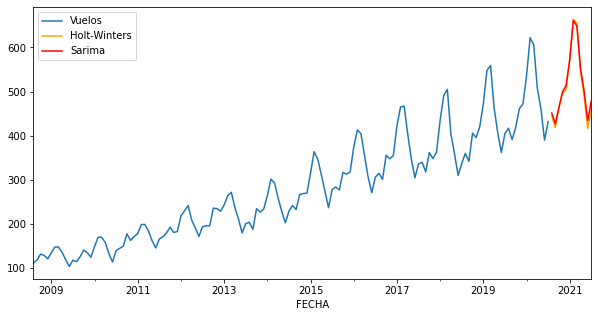

In [47]:
df1.plot(kind="line",figsize=(10,5),legend=True)
HW_forcast.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='Holt-Winters')
AS_forcast.plot(kind="line",figsize=(10,5),color='red',legend=True,label='Sarima')
plt.show()